In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import timeit

from QuantumWalkTest.StateTest import StateTest
from QuantumWalkTest.OperatorTest import OperatorTest
from QuantumWalkTest.QuantumWalkTest import QuantumWalkTest
from QuantumWalkTest.ProbabilityDistributionTest import ProbabilityDistributionTest
from QuantumWalkTest.QuantumWalkDaoTest import QuantumWalkDaoTest

def printTimes(qwCont):
    print("Total Execution time: %s seconds."%round(qwCont.daoExecutionTime,5))
    print("\tState took %s seconds.\n"%round(qwCont.initStateExecutionTime ,5))
    print("\tOperator took %s seconds."%round(qwCont.fullExecutionTime2,5))
    print("\t\tEigh took %s seconds."%round(qwCont.eighExecutionTime2,5))
    print("\t\tDiag took %s seconds."%round(qwCont.diagExecutionTime2,5))
    print("\t\tMatMul took %s seconds.\n"%round(qwCont.matMulExecutionTime2,5))
    print("\tWalk took %s seconds.\n"%round(qwCont.walkExecutionTime,5))
    print("\tProbDist took %s seconds."%round(qwCont.probDistExecutionTime,5))

# Cycle Graph Explicit

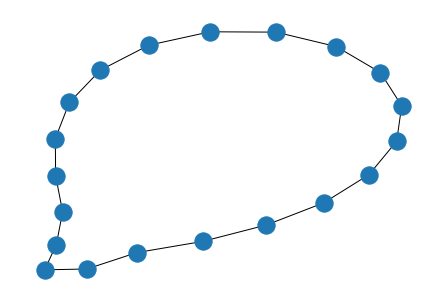

In [6]:
nx.draw(nx.cycle_graph(20))

In [10]:
# ------ Initial Conditions ------ #
n = 1000
t=600
gamma=1/(2*np.sqrt(2))
marked = [int(n/2)]

# ------ Initial State ------ #
initState = StateTest(n,marked)
initState.timedBuildState()
print("N=%s\tTime=%s\tGamma=%s"%(n,t,round(gamma,2)))
print("State took %s seconds."%(round(initState.stateExecutionTime,5)))

N=1000	Time=600	Gamma=0.35
State took 2e-05 seconds.


In [11]:
# ------ NetworkX Graph  ------ #
startTimeGraph = timeit.default_timer()
graph2 = nx.cycle_graph(n)
endTimeGraph = timeit.default_timer()

executionTimeGraph = (endTimeGraph - startTimeGraph)
print("Graph took %s seconds." % executionTimeGraph)

Graph took 0.066503652999927 seconds.


In [24]:
# ------ Diagonal version of evolution operator------ #
op = OperatorTest(graph2,t,gamma)
op.timedBuildDiagonalOperator2()
print("Total Execution time: %s seconds."%op.fullExecutionTime2)
print("\tEigh took %s seconds."%op.eighExecutionTime2)
print("\tDiag took %s seconds."%op.diagExecutionTime2)
print("\tMatMul took %s seconds."%op.matMulExecutionTime2)

Total Execution time: 0.41585405400019226 seconds.
	Eigh took 0.2887129989994719 seconds.
	Diag took 0.0029895990001023165 seconds.
	MatMul took 0.12414106399955926 seconds.


In [32]:
# ------ Amplitudes of Final State ------ #
walk = QuantumWalkTest(initState,op)
walk.timedBuildWalk()
print("Walk took %s seconds"%walk.walkExecutionTime)
finalState = walk.getWalk()

Walk took 0.008385767999243399 seconds


In [16]:
# ------ Probabilities of Final State ------ #
probDist = ProbabilityDistributionTest(finalState)
probDist.timedBuildProbDist()
print("ProbDist took %s seconds."%probDist.probDistExecutionTime)
probabilities = probDist.getProbDist()

ProbDist took 0.04441979400007767 seconds.


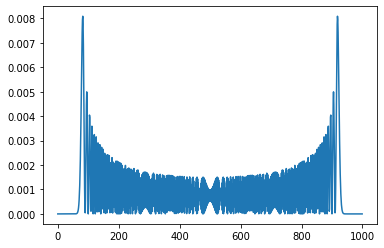

In [17]:
plt.plot(probabilities)

# Grid graph with QWDao

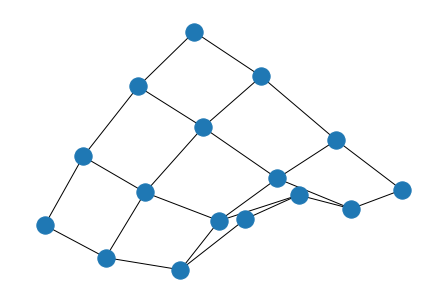

In [5]:
nx.draw(nx.grid_2d_graph(4, 4))

In [6]:
# ------ Initial Conditions ------ #
n = 10
m = 100
t= 20
gamma=1/(2*np.sqrt(2))
marked = [int(n/2)]
graph = nx.grid_2d_graph(n, m)

In [1]:
qwDao = QuantumWalkDaoTest(n*m,graph,t,gamma,marked,'2')
printTimes(qwDao)


NameError: name 'QuantumWalkDaoTest' is not defined

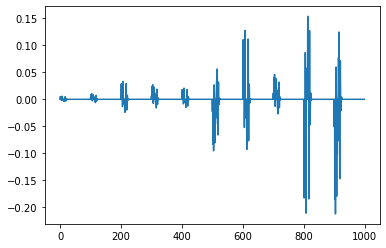

In [41]:
qwAmplitudes = qwDao.getWalk()
plt.plot(qwAmplitudes.getStateVec())

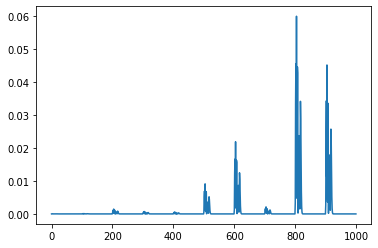

In [42]:
qwProbabilities = qwDao.getProbDist()
plt.plot(qwProbabilities)

# Circular Ladder Graph with Dao

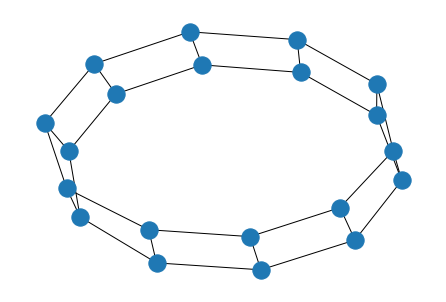

In [43]:
nx.draw(nx.circular_ladder_graph(10))

In [64]:
# ------ Initial Conditions ------ #
n = 500
t= 60
gamma=1/(2*np.sqrt(2))
marked = [int(n/2)]
graph = nx.circular_ladder_graph(n)

In [65]:
qwDao = QuantumWalkDaoTest(2*n,graph,t,gamma,marked,'2')
printTimes(qwDao)


######### Running: (np.Eig * D.toList) @ np.EigH ##########

######### Completed: (np.Eig * D.toList) @ np.EigH ##########

Total Execution time: 0.5176 seconds.

	State took 0.47408 seconds.

	Operator took 0.47408 seconds.
		Eigh took 0.3245 seconds.
		Diag took 0.00263 seconds.
		MatMul took 0.14695 seconds.

	Walk took 0.00127 seconds.

	ProbDist took 0.03398 seconds.


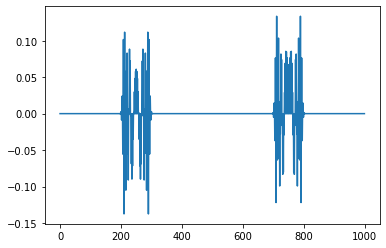

In [66]:
qwAmplitudes = qwDao.getWalk()
plt.plot(qwAmplitudes.getStateVec())

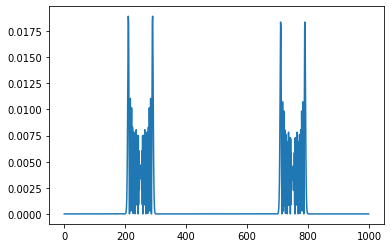

In [67]:
qwProbabilities = qwDao.getProbDist()
plt.plot(qwProbabilities)

# Dorogovtsev-Goltsev-Mendes graph with Dao

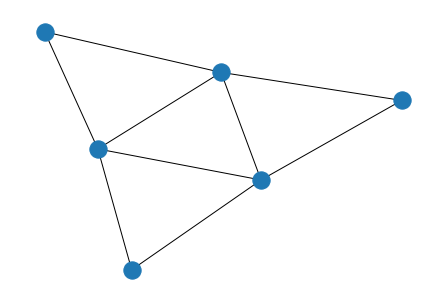

In [68]:
nx.draw(nx.dorogovtsev_goltsev_mendes_graph(2))

In [100]:
# ------ Initial Conditions ------ #
k = 7
t= 60
gamma=1/(2*np.sqrt(2))
graph = nx.dorogovtsev_goltsev_mendes_graph(k)
n = len(graph)
marked = [int(n/2)]

In [101]:
qwDao = QuantumWalkDaoTest(n,graph,t,gamma,marked,'2')
printTimes(qwDao)


######### Running: (np.Eig * D.toList) @ np.EigH ##########

######### Completed: (np.Eig * D.toList) @ np.EigH ##########

Total Execution time: 0.70919 seconds.
	State took 6e-05 seconds.

	Operator took 0.65478 seconds.
		Eigh took 0.5129 seconds.
		Diag took 0.00284 seconds.
		MatMul took 0.13903 seconds.

	Walk took 0.00168 seconds.

	ProbDist took 0.03169 seconds.


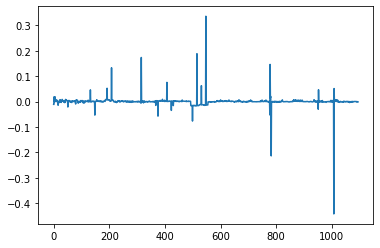

In [102]:
qwAmplitudes = qwDao.getWalk()
plt.plot(qwAmplitudes.getStateVec())

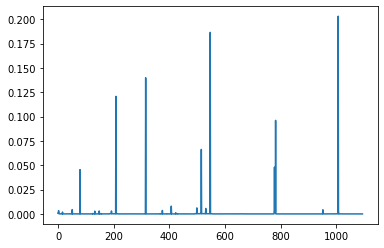

In [103]:
qwProbabilities = qwDao.getProbDist()
plt.plot(qwProbabilities)

# Hexagonal lattice graph with Dao

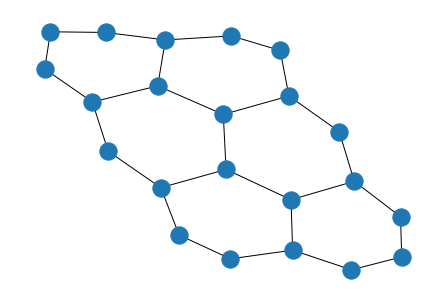

In [93]:
nx.draw(nx.hexagonal_lattice_graph(3,2))


In [105]:
# ------ Initial Conditions ------ #
i = 20
j = 20
t= 15
gamma=1/(2*np.sqrt(2))
graph = nx.hexagonal_lattice_graph(i,j)
n = len(graph)
marked = [int(n/2)]

In [106]:
qwDao = QuantumWalkDaoTest(n,graph,t,gamma,marked,'2')
printTimes(qwDao)

######### Running: (np.Eig * D.toList) @ np.EigH ##########

######### Completed: (np.Eig * D.toList) @ np.EigH ##########

Total Execution time: 0.5169 seconds.
	State took 5e-05 seconds.

	Operator took 0.4714 seconds.
		Eigh took 0.35279 seconds.
		Diag took 0.0021 seconds.
		MatMul took 0.1165 seconds.

	Walk took 0.00092 seconds.

	ProbDist took 0.02562 seconds.


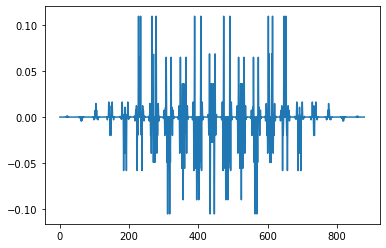

In [107]:
qwAmplitudes = qwDao.getWalk()
plt.plot(qwAmplitudes.getStateVec())

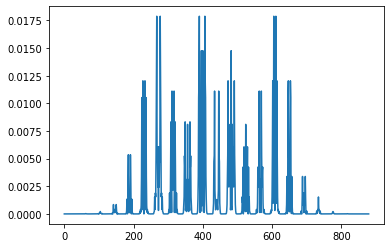

In [108]:
qwProbabilities = qwDao.getProbDist()
plt.plot(qwProbabilities)

# Hypercube graph

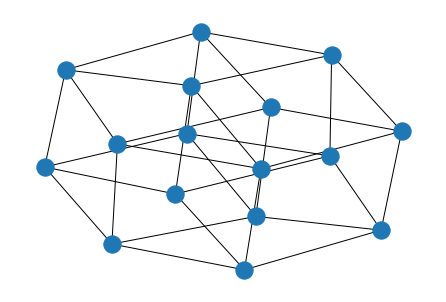

In [109]:
nx.draw(nx.hypercube_graph(4))

In [138]:
# ------ Initial Conditions ------ #
k=10
t= 1.5
gamma=1/(2*np.sqrt(2))
graph = nx.hypercube_graph(k)
n = len(graph)
print("%s nodes."%n)
marked = [int(n/2)]

1024 nodes.


In [139]:
qwDao = QuantumWalkDaoTest(n,graph,t,gamma,marked,'2')
printTimes(qwDao)

######### Running: (np.Eig * D.toList) @ np.EigH ##########

######### Completed: (np.Eig * D.toList) @ np.EigH ##########

Total Execution time: 0.75105 seconds.
	State took 4e-05 seconds.

	Operator took 0.6897 seconds.
		Eigh took 0.51444 seconds.
		Diag took 0.00289 seconds.
		MatMul took 0.17235 seconds.

	Walk took 0.00131 seconds.

	ProbDist took 0.03173 seconds.


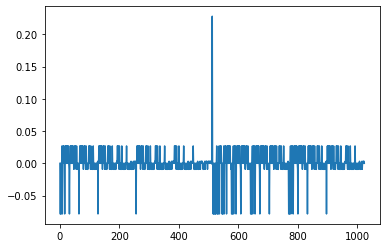

In [140]:
qwAmplitudes = qwDao.getWalk()
plt.plot(qwAmplitudes.getStateVec())

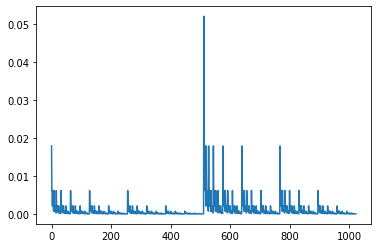

In [141]:
qwProbabilities = qwDao.getProbDist()
plt.plot(qwProbabilities)